Suorita taas ainakin minuutin mittainen havaintosarja, jonka aikana kävelet tasaista reipasta vauhtia ja samalla mittaat
kiihtyvyyttä Phyphox -sovelluksella tai käytä aiemmin askelmittarissa käytettyä dataa. Laske askeleesi kävelyn aikana
ja merkitse tulos muistiin.

a: Tuo havaintodata Pythoniin ja piirrä sen kuvaaja.

b: Tutki, miten askelet näkyvät havainnoissa jaksollisena liikkeenä

c: Määrittele, mikä kiihtyvyyden komponentti näyttää jaksollisuuden parhaiten ja valitse se seuraaviin kohtiin.

d: Laske valitun komponentin Fourier-muunnos ja tehospektri.

e: Määrittele tehospektristä tehokkain taajuus. Vastaako tämä oletettua askeltaajuutta?

f: Laske askelten kokonaismäärä askeltaajuuden perusteella.

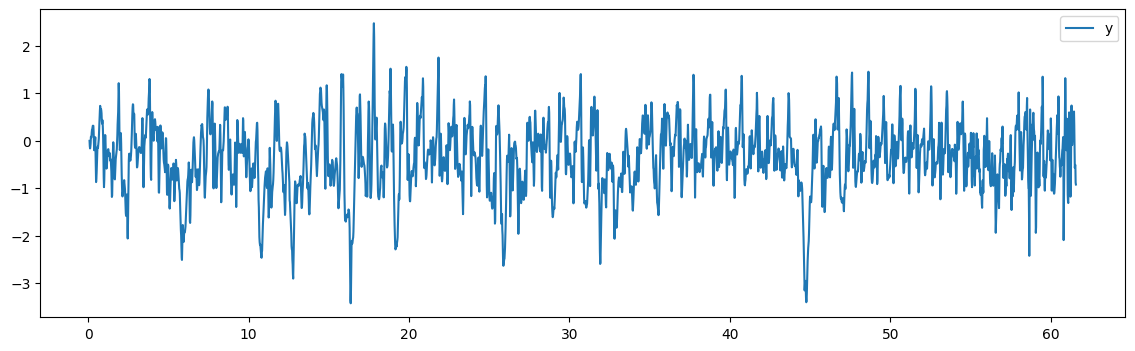

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Acceleration.csv')
df.head()

plt.figure(figsize=(14,4))
#plt.plot (df['Time (s)'], df['Linear Acceleration x (m/s^2)'])
plt.plot (df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
#plt.plot (df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
#plt.legend(['x','y','z'])
plt.legend(['y'])

plt.show()

c: Selkein jaksollisuus on y-komponentissa

Seuraavaksi lasketaan Fourier-muunnos ja tehospektri.

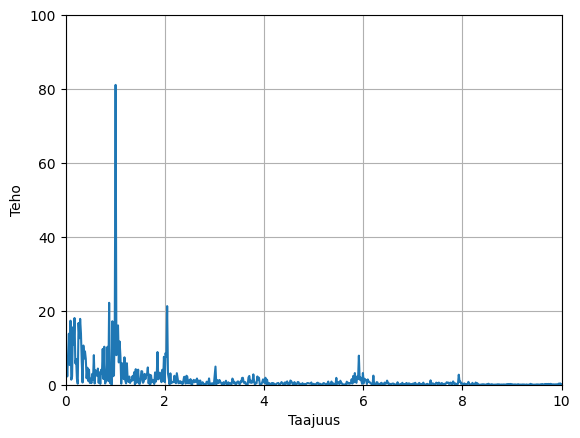

In [27]:
import numpy as np

f = df['Linear Acceleration y (m/s^2)'] #Valittu signaali y
t = df['Time (s)'] #Aika
N = len(df) #Havaintojen määrä
dt = np.max(t)/len(t) #Oletetaan sämpläystaajuus vakioksi

fourier = np.fft.fft(f,N) #Fourier-muunnos
psd = fourier*np.conj(fourier)/N #Tehospektri
freq = np.fft.fftfreq(N,dt) #Taajuus

L = np.arange(1,int(N/2))#Rajataan pois nollataajuus ja negatiiviset taajuudet

plt.plot(freq[L],psd[L].real)
plt.ylabel('Teho')
plt.xlabel('Taajuus')
plt.grid()
plt.axis([0,10,0,100])
plt.show()


Määritellään tehokkain taajuus ja lasketaan askelten kokonaismäärä aslkeltaajuuden perusteella 

In [28]:
print('Kävelydatan tehokkain taajuus on',freq[L][psd[L]==np.max(psd[L])][0],'Hz')
print('Tämä vastaa askeleeseen kuluvaa aikaa',1/freq[L][psd[L]==np.max(psd[L])][0],'s')
print('Tällöin askelmäärä on',freq[L][psd[L]==np.max(psd[L])][0]*np.max(t),'askelta')

Kävelydatan tehokkain taajuus on 1.006943015172972 Hz
Tämä vastaa askeleeseen kuluvaa aikaa 0.9931048579032258 s
Tällöin askelmäärä on 62.0 askelta
